<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 2</b></center>    
<pre>    

# EDA & Pipeline: Google Play Store Apps

**Dataset:** Google Play Store Apps (Available on Kaggle) <BR>
**Objective:** Transform raw, messy data into clean, actionable insights using Pandas and Scikit-Learn pipelines.<BR>
**Focus:** Data Cleaning, String Sanitization, Advanced Imputation, Correlation, and Pipelines.<BR>

### 1. Setup & Initialization

**Exercise 1: Import Dependencies**
* Import `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
* Set pandas options to display all columns (visual aid).

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colums',None)

**Exercise 2: Data Loading & Initial Inspection**
* Load the `googleplaystore.csv` file.
* Display the first 5 rows.
* **Check:** Look closely at the `Installs`, `Size`, and `Price` columns. Notice they are currently Objects (strings), not numbers.

In [5]:
df = pd.read_csv("googleplaystore.csv")

df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Data Integrity Check

**Exercise 3: Audit Data Types and Missing Values**
* Use a single command to view data types (`dtypes`) and non-null counts.
* Calculate the *percentage* of missing values for each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
missing_percent = df.isnull().mean() * 100
missing_percent

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

**Exercise 4: Handling Duplicates**
* Duplicate entries skew results. Check for duplicate rows.
* Drop duplicates, keeping the *first* occurrence. Verify the shape change.

In [9]:
# For Checking Duplicates use duplicated()
# Use drop_duplicates to Drop()

before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print("Rows before:", before)
print("Rows after:", after)
print("Duplicates removed:", before - after)


Rows before: 10841
Rows after: 10358
Duplicates removed: 483


### 3. Advanced String Sanitization (Crucial Step)

**Exercise 5: Cleaning the 'Installs' Column**
* The `Installs` column contains characters like `+` and `,` (e.g., "10,000+").
* Remove these characters.
* Convert the column to a numeric integer type.

In [6]:
# use Column.astype(str).str.replace

In [ ]:
# use to_numeric to convert to int

In [12]:
df['Installs'] = (
    df['Installs']
        .str.replace('+', '', regex=False)
        .str.replace(',', '', regex=False)
        .astype('str')
)


In [13]:
df['Installs'].head()
df['Installs'].dtype


dtype('O')

**Exercise 6: Cleaning the 'Price' Column**
* The `Price` column contains the `$` symbol (e.g., "$4.99").
* Remove the symbol.
* Convert the column to a `float`.

In [24]:
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace('$', '', regex=False)
)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].dtype


df["Size"]

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838     9500000.0
10839           NaN
10840    19000000.0
Name: Size, Length: 10358, dtype: float64

**Exercise 7: Complex Logic - Sanitizing 'Size'**
* The `Size` column is messy. It contains 'M' (Megabytes), 'k' (kilobytes), and string 'Varies with device'.
* **Task:** Write a function (or apply lambda) to:
    1.  Replace 'k' with 'e+3' and 'M' with 'e+6'.
    2.  Coerce 'Varies with device' to `NaN`.
    3.  Convert the string to a number.

In [25]:
def clean_size(value):
    if isinstance(value, str):
        value = value.strip()

        if value == "Varies with device":
            return np.nan


        if value.endswith('k'):
            return float(value.replace('k', 'e+3'))

       
        if value.endswith('M'):
            return float(value.replace('M', 'e+6'))

  
    try:
        return float(value)
    except:
        return np.nan


df['Size'] = df['Size'].apply(clean_size)
print(df['Size'].head())


0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64


### 4. Advanced Imputation

**Exercise 8: Analyzing Missing 'Rating'**
* The `Rating` column has missing values.
* **Visualize** the distribution of Ratings using a Histogram or KDE plot to decide between Mean vs Median imputation.

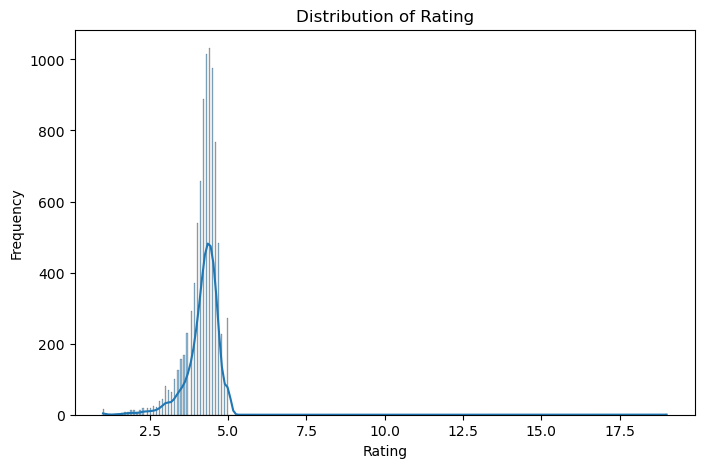

In [39]:

plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], kde=True)
plt.title("Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


**Exercise 9: Group-Specific Imputation**
* Fill missing `Rating` values with the **Median Rating** of the specific `Category` the app belongs to.
* *Example:* If a "Business" app is missing a rating, fill it with the median rating of all "Business" apps.

In [ ]:
df['Rating'] = df.groupby('Category')['Rating']

#After this use transform Method

**Exercise 10: Drop Remaining NaNs**
* For the remaining columns with minimal missing data (like `Current Ver`), simply drop the rows containing NaNs to ensure a clean dataset for correlation.

In [ ]:
# dropna

### 5. Correlation & Visualization

**Exercise 11: Correlation Matrix**
* Generate a correlation matrix for the numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, `Price`).

In [17]:

# Hint: numeric_only Use CORR





,Rating,Size,Installs,Price
Rating,1.000000,0.065161,0.048168,-0.019242
Size,0.065161,1.000000,0.168805,-0.023818
Installs,0.048168,0.168805,1.000000,-0.010290
Price,-0.019242,-0.023818,-0.010290,1.000000


**Exercise 12: Heatmap Visualization**
* Visualize the correlation matrix using a Seaborn Heatmap.
* Annotate the values.

In [1]:
# Hint: sns.heatmap



**Exercise 13: Scatter Plot Analysis**
* Create a Scatter Plot to analyze the relationship between `Reviews` and `Installs`.
* **Note:** You might need to use a log scale for the axes if the data is skewed.

In [23]:
# If needed
#plt.xscale('log')
#plt.yscale('log')
#plt.title('Reviews vs Installs (Log Scale)')
#plt.show()

**Exercise 14: Categorical Aggregation**
* Create a Bar Plot showing the top 10 Categories by **Total Installs**.

In [ ]:

top_cats = df.groupby('Category')['Installs']


### 6. Building a Sklearn Pipeline

**Exercise 15: Preprocessing Pipeline**
* Imagine you want to predict the `Rating` (Target).
* Create a Scikit-Learn `ColumnTransformer` that:
    1.  StandardScales the numerical features (`Reviews`, `Size`, `Installs`, `Price`).
    2.  OneHotEncodes the categorical feature (`Category`, `Content Rating`).
* Display the pipeline object.

# Without Pipline

In [46]:
from sklearn.preprocessing import StandardScaler

# Use

--- Numeric Scaling Results ---
  Reviews  Reviews_Scaled
0     159       -0.146291
1     967       -0.145787
2   87510       -0.091790
3  215644       -0.011842
4     967       -0.145787


,Cat_1.9,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,Cat_BUSINESS,Cat_COMICS,Cat_COMMUNICATION,Cat_DATING,Cat_EDUCATION,...,Cat_PERSONALIZATION,Cat_PHOTOGRAPHY,Cat_PRODUCTIVITY,Cat_SHOPPING,Cat_SOCIAL,Cat_SPORTS,Cat_TOOLS,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# With Pipline(Optional part)

In [31]:

# Hint: from sklearn.compose import ColumnTransformer
# Hint: from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Hint: from sklearn.pipeline import Pipeline


